In [1]:
import numpy as np
import os 
import sys
import pandas as pd
import multiprocessing

import aicsimageio
import aicsimageio.readers as ar

from skimage import (
    restoration, util
)

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = "/nfs/turbo/umms-indikar/shared/projects/live_cell_imaging/test/3x3-extract-Scene6-07-14to15_stitched.czi"

img = ar.czi_reader.CziReader(filepath)
img.shape

(1, 1, 49, 4, 1329, 1801)

In [3]:
red_idx = 2
green_idx = 1
blue_idx = 3

red = img.data[0, 0, :, red_idx - 1 , :, :]
green = img.data[0, 0, :, green_idx - 1 , :, :]
blue = img.data[0, 0, :, blue_idx - 1, :, :]

print(red.shape)
print(green.shape)
print(blue.shape)

(49, 1329, 1801)
(49, 1329, 1801)
(49, 1329, 1801)


In [4]:
def prepare(img):
    """A function to clean an image at each timepoint individually"""
    radius = 20
    background = restoration.rolling_ball(img, radius=radius)
    res = img - background
    return res
    
    
    
def paralell_prepare(img):
    """A function parallelize preparation functions """

    pool = multiprocessing.Pool(36)
    img_list = list(img)
    img_list = list(zip(*pool.map(prepare, img_list)))
    new_img = np.asarray(img_list)
    return new_img


new_img = paralell_prepare(blue)
print(new_img.shape)




(1329, 49, 1801)


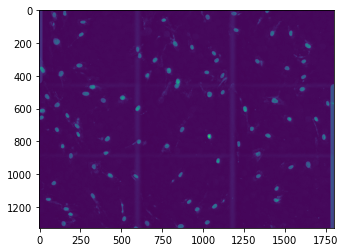

In [5]:
plt.imshow(new_img[:, 10, :])

